<a href="https://colab.research.google.com/github/ilnegri7/primoanno/blob/main/FitMolla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercizio sulla molla
Si assume che 
- il file di dati sia di tipo testo 
- i dati siano su due colonne tempo e spazio
- che le colonne siano separate da una tab "\t"
- che il file sia disponibile ad una URL

**NB** il file può essere caricato "manualmente" su questa macchina virtuale oppure letto da google drive 

## Parametro editabili
Parametri utilizzati in seguito. 
E' possibile sia editare il codice (sx), che usare i campi a dx.

In [6]:
#@title Parametri editabili { run: "auto" }
url="http://anegri.web.cern.ch/anegri/M0.txt" #@param {type:"string"}
plotSizeX=16                                  #@param {type:"integer"}
plotSizeY=5                                   #@param {type:"integer"} 

## Lettura dei dati
I dati vengono:
1. letti dalla URL e salvati in un dataframe pandas
2. estratti dal dataframe verso due array numpy: t e x

In [2]:
#@title
# Import del modulo pandas
import pandas as pd 

# pd.read_csv legge i dati dalla URL usando:
#  - '\t' come separatore di compo
#  - 't' e 'x' come nome delle colonne
df=pd.read_csv(url, sep='\t', names=["t", "x"])  
df.head(4)  # Stampa delle prime 4 righe per test

# Estrazione dei due array numpy
data = df.values
t = data[:,0]
x = data[:,1]

## Plot dei dati 
Si utilizzo il modulo [matplotlib](https://matplotlib.org/2.1.1).

I colori e tipo di marker sono definiti dal terzo parametro: 'r+'
- 'r' significa rosso
- '+' significa croce
Per dettagli vedi [link](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html)

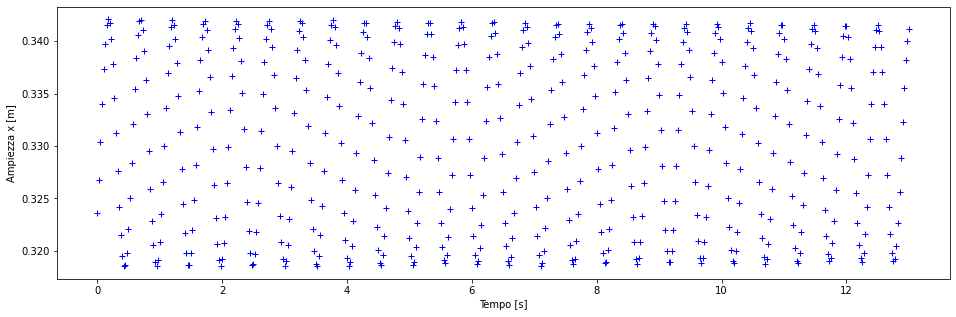

In [7]:
#@title
import matplotlib.pyplot as plt
plt.figure(figsize=(plotSizeX,plotSizeY))
plt.plot(t, x, 'b+')  # r=red, +=marker
plt.xlabel('Tempo [s]')
plt.ylabel('Ampiezza x [m]')
plt.show()

##Fitting

### Definizione della funzione
E' la funzione che verrà usata per il fit.
Nel nostro caso la funzione è 
> $x(t) = e^{-\lambda t} A cos(\omega_s + \phi) + x_M$
dove
- $\lambda$ è il coefficiente di smorzamento del moto dovuto all'attrito dell'aria
- A è l'ampiezza di oscillazione
- $\omega_s$ è la frequenza angolare di oscillazione
- $\phi$ è la fase iniziale
- $x_M$ è la posizione di equilibrio

Si utilizza [numpy](https://numpy.org/) perchè le variabili sono array di dati.

In [ ]:
#@title
import numpy as np
# Definizione della funzione di fit
def funzione(t, L, A, ws, ph, xM):
  return np.exp(-L*t) * A * np.cos(ws*t+ph) + xM

### Fit dei dati 
Si utilizza la funzione [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) del modulo [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html).

A **curve_fit** vengono passati:
- la funzione da utilizzare per il fit definita in precedenza: **funzione()**
- gli array dei dati, cioè: t e x

E vengono ritornati:
- **popt**: l'array del parametri fittati
- **pcov**: la matrice di covarianza; i cui elementi della diagonale rappresentano la varianza dei rispettivi parametri. La radice quadrata dei quali da l'errore del parametro. 


In [ ]:
#@title
# Fitting 
from scipy.optimize import curve_fit
popt, pcov = curve_fit(funzione, t, x)  # Fit esando la nostra funzione di fit

# Stampa dei parametri e degli errori
label = ["Lambda", "Ampiezza", "Pulsazione", "Fase", "Posizione"]
for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
  print("%10s = %9.6f +- %7.6f" % (l ,v, e))

    Lambda =  0.003595 +- 0.000089
  Ampiezza =  0.011828 +- 0.000008
Pulsazione = 12.237664 +- 0.000088
      Fase = -2.173256 +- 0.000652
 Posizione =  0.330240 +- 0.000003


### Plot della curva di fit sovraimposta ai dati
Il codice seguente disegna la curva del fit e quindi sovraimpone i dati.

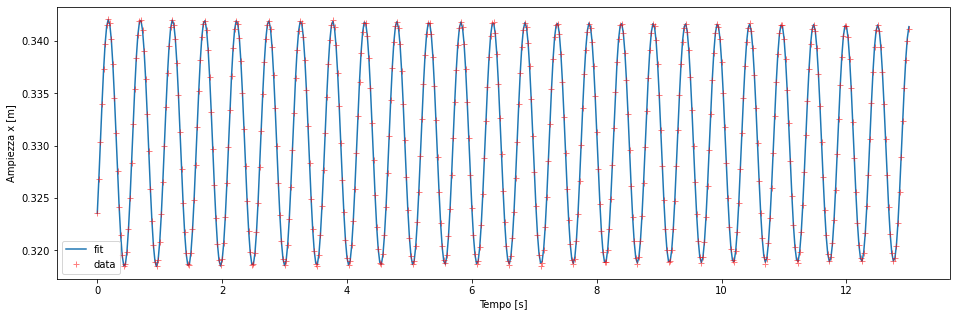

In [ ]:
#@title
plt.figure(figsize=(plotSizeX,plotSizeY))
plt.plot(t, funzione(t, *popt), label="fit")
plt.plot(t, x, 'r+', label='data', alpha=0.5)
plt.xlabel('Tempo [s]')       # Titolo ascissa
plt.ylabel('Ampiezza x [m]')  # Titolo ordinata
plt.legend()   # Stampa la legenda
plt.show()     # Mostra il plot